# Nama: Devi Andini Febrianti
# No/Nim: 09/2141720189
# Kelas: 3H

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

# 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [2]:
# import package
import numpy as np
import pandas as pd

Import ini digunakan uuntuk manipulasi data

In [3]:
# baca data dari file CS
data = 'data/insurance.csv'
df = pd.read_csv(data)

In [45]:
# melihat beberapa data awal
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
# mengecek ukuran data
df.shape

(1338, 7)

In [47]:
# informasi tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
# deskripsi data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data diatas dapat didefinisikan sebagai berikut:
- Variabel Bebas: 1. age
                  2. sex
                  3. bmi
                  4. children
                  5. smoker
                  6. region
- Variabel Target: charges    
alasannya dikarenakan pada kasus ini yang akan diprediksi adalah biaya asuransi yang akan dibayar maka yang termasuk variabel bebas adalah data data yang mempengaruhi biaya asuransi tersebut             

# 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [50]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#pisahkan variabel target (charges) dan variabel bebas (fitur)
X = df[['age', 'bmi', 'children']]  # Kolom fitur
y = df['charges']  # Kolom target

#membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# menampilkan jumlah baris dalam setiap subset
print("Jumlah data latih: ", len(X_train))
print("Jumlah data uji: ", len(X_test))

Jumlah data latih:  936
Jumlah data uji:  402


c:\Users\IDEAPAD LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


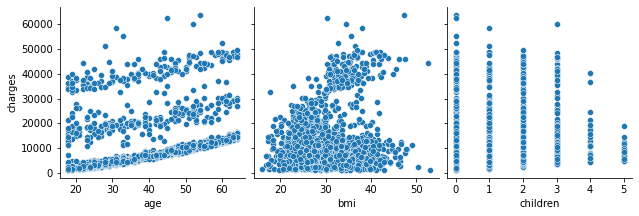

In [52]:
# visualisasi data dengan pairplot
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars='charges', size=3, aspect=1, kind='scatter')
plt.show()

In [53]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = df['age']
y = df['charges']

In [54]:
X.head()

0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

In [55]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [56]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

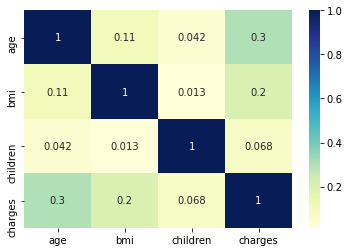

In [57]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# 3. Lakukan feature scaling jika diperlukan.

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [66]:
from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [67]:
from sklearn.svm import SVR
support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)
support_vector_reg.fit(x_train, y_train)

c:\Users\IDEAPAD LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1000, gamma='auto', kernel='linear')

# 5. Latih model pada data latih dan lakukan prediksi pada data uji.

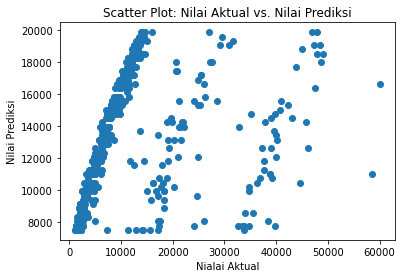

In [60]:
#Training Model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

plt.scatter(y_test, y_test_pred)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Scatter Plot: Nilai Aktual vs. Nilai Prediksi")
plt.show()

# 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# hitung nilai R-squad
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_test_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_test_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, y_test_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 9031.799151222724
MSE: 134798778.0695984
RMSE: 11610.287596334485
R-squared: 0.07161898944046363
